## Практическое задание

<ol>
    <li>Попробуйте изменить параметры нейронной сети работающей с датасетом imdb либо нейронной сети работающей airline-passengers(она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить ее точность. Приложите анализ.</li>
    <li>Попробуйте изменить параметры нейронной сети генерирующий текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившейся у вас текст и опишите, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.</li>
    <li>* Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM</li>
    <li>* Предложите свои варианты решения проблемы исчезающего градиента в RNN</li>
</ol>

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.utils import pad_sequences

In [ ]:
from tensorflow.keras.layers import Conv1D, Flatten, SimpleRNN, GRU, Dropout, MaxPooling1D, Reshape

In [ ]:
import pandas as pd

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
max_features = 10000
maxlen = 100
batch_size = 2048

In [ ]:
import tensorflow as tf
tf.config.threading.set_inter_op_parallelism_threads(0)
tf.random.set_seed(42)

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
for i in [x_train, y_train, x_test, y_test]:
    print(i.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
y_train[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print(x_train.shape, x_test.shape)

(25000, 100) (25000, 100)


In [ ]:
base_model = Sequential([
    Embedding(max_features, 128),
    LSTM(128, dropout=0.4, recurrent_dropout=0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
def compile_and_fit_model(model):
    model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              verbose=0
             )
    return model

In [ ]:
result_dict = {'model_name': [],
              'train_acc': [],
              'test_acc': []}

In [ ]:
def eval_model_and_fill_result_dict(model, name):
    result_dict['model_name'].append(name)
    train_loss, train_acc = model.evaluate(x_train, y_train)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    result_dict['train_acc'].append(f'{train_acc:.4f}')
    result_dict['test_acc'].append(f'{test_acc:.4f}')

In [ ]:
compile_and_fit_model(base_model)

In [ ]:
eval_model_and_fill_result_dict(base_model, 'Базовый вариант')

782/782 [==============================] - 27s 34ms/step - loss: 0.4663 - accuracy: 0.8360


In [ ]:
more_lstm_model = Sequential([
    Embedding(max_features, 128),
    LSTM(128, return_sequences=True, dropout=0.4, recurrent_dropout=0.4),
    LSTM(64, return_sequences=False, dropout=0.4, recurrent_dropout=0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
compile_and_fit_model(more_lstm_model)

In [ ]:
eval_model_and_fill_result_dict(more_lstm_model, 'Больше LSTM солев')

782/782 [==============================] - 51s 65ms/step - loss: 0.4789 - accuracy: 0.8307


In [ ]:
SRNN_model = Sequential([
    Embedding(max_features, 128),
    SimpleRNN(128),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
compile_and_fit_model(SRNN_model)

In [ ]:
eval_model_and_fill_result_dict(SRNN_model, 'RNN')

782/782 [==============================] - 9s 12ms/step - loss: 0.7059 - accuracy: 0.8128


In [ ]:
GRU_model = Sequential([
    Embedding(max_features, 128),
    GRU(128),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
compile_and_fit_model(GRU_model)

In [ ]:
eval_model_and_fill_result_dict(GRU_model, 'GRU')

782/782 [==============================] - 3s 4ms/step - loss: 0.5793 - accuracy: 0.8269


In [ ]:
result_dict

{'model_name': ['Базовый вариант', 'Больше LSTM солев', 'RNN', 'GRU'],
 'train_acc': ['0.9658', '0.9634', '0.9998', '0.9768'],
 'test_acc': ['0.8360', '0.8307', '0.8128', '0.8269']}

In [ ]:
result_df = pd.DataFrame(result_dict)

In [ ]:
result_df.sort_values('test_acc', ascending=False)

,model_name,train_acc,test_acc
0,Базовый вариант,0.9658,0.8360
1,Больше LSTM солев,0.9634,0.8307
3,GRU,0.9768,0.8269
2,RNN,0.9998,0.8128


In [ ]:
top_model = Sequential([
    Embedding(max_features, 128),
    Conv1D(128, 15, activation='tanh'),
    LSTM(128, return_sequences=False),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
top_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         1280000   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         245888    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,661,633
Trainable params: 1,661,633
No

In [ ]:
compile_and_fit_model(top_model)

In [ ]:
eval_model_and_fill_result_dict(top_model, 'Conv1d->LSTM')

782/782 [==============================] - 3s 4ms/step - loss: 0.7367 - accuracy: 0.8167


In [ ]:
result_df = pd.DataFrame(result_dict)

In [ ]:
result_df.sort_values('test_acc', ascending=False)

,model_name,train_acc,test_acc
0,Базовый вариант,0.9658,0.8360
1,Больше LSTM солев,0.9634,0.8307
3,GRU,0.9768,0.8269
4,Conv1d->LSTM,0.9885,0.8167
2,RNN,0.9998,0.8128


In [ ]:
second_top_model = Sequential([
    Embedding(max_features, 128),
    Conv1D(128, 3, activation='tanh'),
    MaxPooling1D(pool_size=4),
    LSTM(128, return_sequences=False),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
compile_and_fit_model(second_top_model)

In [ ]:
eval_model_and_fill_result_dict(top_model, 'Conv1d->MaxPoolingLSTM')

782/782 [==============================] - 3s 4ms/step - loss: 0.7367 - accuracy: 0.8167


In [ ]:
one_more_model = Sequential([
    Embedding(max_features, 128),
    Conv1D(128, 3, activation='tanh'),
    MaxPooling1D(pool_size=4),
    LSTM(128, return_sequences=False),
    Dropout(0.4),
    Dense(400, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
compile_and_fit_model(second_top_model)

In [ ]:
eval_model_and_fill_result_dict(second_top_model, 'Conv1d->MaxPooling->LSTM + lots of dense')

782/782 [==============================] - 3s 4ms/step - loss: 1.0551 - accuracy: 0.7979


In [ ]:
the_best_model = Sequential([
    Embedding(max_features, 256),
    LSTM(256),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
compile_and_fit_model(the_best_model)

In [ ]:
eval_model_and_fill_result_dict(the_best_model, 'base with lots neurons')

782/782 [==============================] - 4s 5ms/step - loss: 0.5664 - accuracy: 0.8285


In [ ]:
result_df = pd.DataFrame(result_dict)

In [ ]:
result_df.sort_values('test_acc', ascending=False)

,model_name,train_acc,test_acc
0,Базовый вариант,0.9658,0.8360
1,Больше LSTM солев,0.9634,0.8307
7,base with lots neurons,0.9814,0.8285
3,GRU,0.9768,0.8269
4,Conv1d->LSTM,0.9885,0.8167
5,Conv1d->MaxPoolingLSTM,0.9885,0.8167
2,RNN,0.9998,0.8128
6,Conv1d->MaxPooling->LSTM + lots of dense,0.9988,0.7979


In [ ]:
result_df.sort_values('train_acc', ascending=False)

,model_name,train_acc,test_acc
2,RNN,0.9998,0.8128
6,Conv1d->MaxPooling->LSTM + lots of dense,0.9988,0.7979
4,Conv1d->LSTM,0.9885,0.8167
5,Conv1d->MaxPoolingLSTM,0.9885,0.8167
7,base with lots neurons,0.9814,0.8285
3,GRU,0.9768,0.8269
0,Базовый вариант,0.9658,0.8360
1,Больше LSTM солев,0.9634,0.8307


In [ ]:
history = base_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              verbose=0
             )

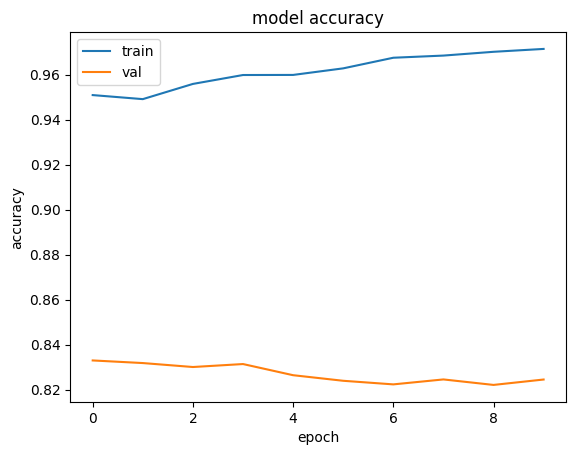

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

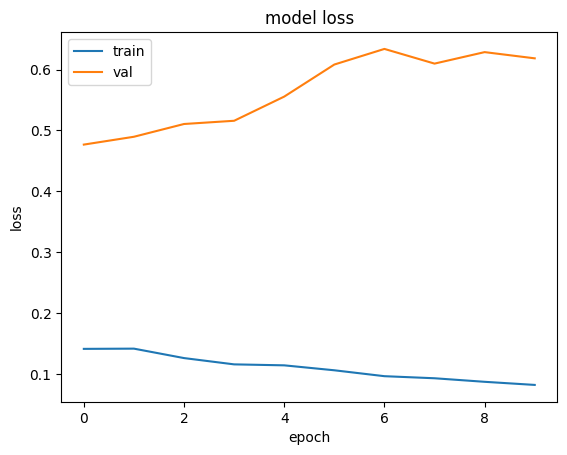

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Очень похоже на переобучение

In [ ]:
max_features = 1000

In [ ]:
base_model_low_features = Sequential([
    Embedding(max_features, 128),
    LSTM(128),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
compile_and_fit_model(base_model_low_features)

In [ ]:
eval_model_and_fill_result_dict(base_model_low_features, 'Базовая, 1000 фичей')

782/782 [==============================] - 3s 4ms/step - loss: 0.3709 - accuracy: 0.8328


In [ ]:
max_features = 5000

In [ ]:
base_model_middle_features = Sequential([
    Embedding(max_features, 128),
    LSTM(128),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
compile_and_fit_model(base_model_middle_features)
eval_model_and_fill_result_dict(base_model_middle_features, 'Базовая, 5000 фичей')

782/782 [==============================] - 4s 5ms/step - loss: 0.4102 - accuracy: 0.8385


In [ ]:
base_model_middle_features_large_LSTM = Sequential([
    Embedding(max_features, 128),
    LSTM(512),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
compile_and_fit_model(base_model_middle_features_large_LSTM)
eval_model_and_fill_result_dict(base_model_middle_features_large_LSTM, 'Базовая, 5000 фичей, 512н LSTM')

782/782 [==============================] - 6s 7ms/step - loss: 0.3566 - accuracy: 0.8452


In [ ]:
result_df = pd.DataFrame(result_dict)

In [ ]:
result_df.sort_values('test_acc', ascending=False)

,model_name,train_acc,test_acc
10,"Базовая, 5000 фичей, 512н LSTM",0.9148,0.8452
9,"Базовая, 5000 фичей",0.9402,0.8385
0,Базовый вариант,0.9658,0.8360
8,"Базовая, 1000 фичей",0.8599,0.8328
1,Больше LSTM солев,0.9634,0.8307
7,base with lots neurons,0.9814,0.8285
3,GRU,0.9768,0.8269
4,Conv1d->LSTM,0.9885,0.8167
5,Conv1d->MaxPoolingLSTM,0.9885,0.8167
2,RNN,0.9998,0.8128


In [ ]:
base_model_middle_features_large_LSTM_large_Dense = Sequential([
    Embedding(max_features, 128),
    LSTM(512),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
compile_and_fit_model(base_model_middle_features_large_LSTM_large_Dense)
eval_model_and_fill_result_dict(base_model_middle_features_large_LSTM_large_Dense, 'Базовая, 5000 фичей, 512н LSTM, 256 Dense')

782/782 [==============================] - 6s 7ms/step - loss: 0.4181 - accuracy: 0.8403


In [ ]:
result_df = pd.DataFrame(result_dict)
result_df.sort_values('test_acc', ascending=False)

,model_name,train_acc,test_acc
10,"Базовая, 5000 фичей, 512н LSTM",0.9148,0.8452
12,"Базовая, 5000 фичей, 512н LSTM, 256 Dense",0.9305,0.8403
9,"Базовая, 5000 фичей",0.9402,0.8385
11,512н LSTM,0.9610,0.8366
0,Базовый вариант,0.9658,0.8360
8,"Базовая, 1000 фичей",0.8599,0.8328
1,Больше LSTM солев,0.9634,0.8307
7,base with lots neurons,0.9814,0.8285
3,GRU,0.9768,0.8269
4,Conv1d->LSTM,0.9885,0.8167


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

final_model = Sequential([
    Embedding(max_features, 128),
    LSTM(512),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

final_model.compile(loss='binary_crossentropy',
                    optimizer='Adam',
                    metrics=['accuracy'])

history = final_model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=100,
                validation_data=(x_test, y_test),
                callbacks=[callback],
                verbose=0
             )

In [ ]:
len(history.history['accuracy'])

53

In [ ]:
eval_model_and_fill_result_dict(final_model, 'Final Model')

782/782 [==============================] - 6s 8ms/step - loss: 0.9651 - accuracy: 0.8140


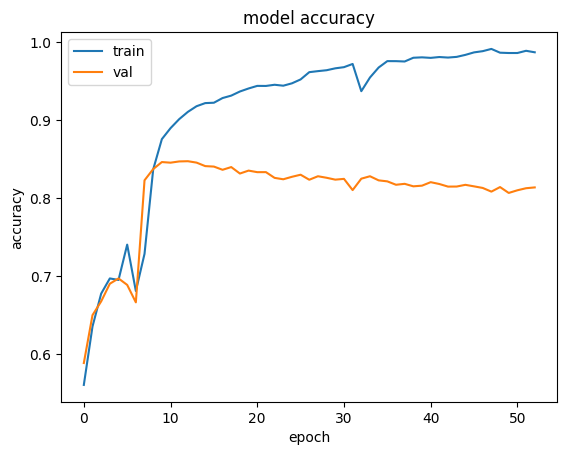

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

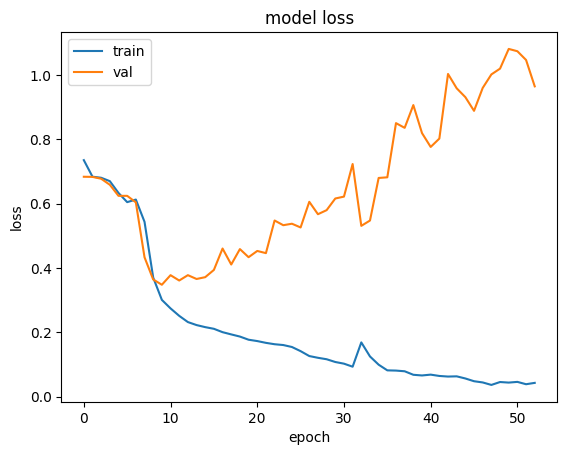

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Вывод - 10 эпох в самый раз.

In [ ]:
result_df = pd.DataFrame(result_dict)
result_df.sort_values('test_acc', ascending=False).head(3)

,model_name,train_acc,test_acc
10,"Базовая, 5000 фичей, 512н LSTM",0.9148,0.8452
12,"Базовая, 5000 фичей, 512н LSTM, 256 Dense",0.9305,0.8403
9,"Базовая, 5000 фичей",0.9402,0.8385


Попробуйте изменить параметры нейронной сети генерирующий текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший получившейся у вас текст и опишите, что вы предприняли, чтобы его получить. Можно использовать текст другого прозведения.

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
tokenizer = Tokenizer(num_words=10000)
data = open('/content/drive/MyDrive/Alice in Wonderland.txt').read()


In [3]:
corpus = data.lower().split('.')

In [7]:
corpus[42]

' i wonder\nwhat i should be like then?’ and she tried to fancy what the flame of a\ncandle is like after the candle is blown out, for she could not remember\never having seen such a thing'

In [10]:
len(corpus)

1207

In [9]:
tokenizer.filters

'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

In [11]:
tokenizer.fit_on_texts(corpus)

In [13]:
total_words = len(tokenizer.word_index) + 1

In [15]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [17]:
input_sequences[42]

[11, 174, 346, 8, 315, 8, 169, 27, 1311, 150, 8, 204, 1, 205, 6, 1, 54, 48]

In [18]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [21]:
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]

In [22]:
label = ku.to_categorical(label, num_classes=total_words)

In [23]:
token_list

[]

In [24]:
tokenizer.index_word[42]

'if'

In [25]:
tokenizer.word_index['if']

42

In [30]:
tokenizer.word_counts['if']

95

In [38]:
input_sequences[42, :]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [36]:
label.shape

(29807, 3399)

In [39]:
callback = EarlyStopping(monitor='val_accuracy', patience=10)

In [42]:
model = Sequential([
    Embedding(total_words, 256, input_length=max_sequence_len-1),
    LSTM(128),
    Dropout(0.2),
    Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(total_words, activation='softmax')
])

In [43]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 306, 256)          870144    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1699)              219171    
                                                                 
 dense_1 (Dense)             (None, 3399)              5778300   
                                                                 
Total params: 7,064,735
Trainable params: 7,064,735
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(predictors, label, epochs=100, validation_split=0.2, callbacks=[callback], verbose=1)

Epoch 1/100
746/746 [==============================] - 421s 561ms/step - loss: 6.3488 - accuracy: 0.0539 - val_loss: 7.0038 - val_accuracy: 0.0708
Epoch 2/100
746/746 [==============================] - 443s 594ms/step - loss: 5.8556 - accuracy: 0.0679 - val_loss: 7.2432 - val_accuracy: 0.0808
Epoch 3/100
746/746 [==============================] - 423s 567ms/step - loss: 5.5462 - accuracy: 0.0906 - val_loss: 7.2764 - val_accuracy: 0.0941
Epoch 4/100
746/746 [==============================] - 430s 576ms/step - loss: 5.2720 - accuracy: 0.1134 - val_loss: 7.4610 - val_accuracy: 0.1115
Epoch 5/100
746/746 [==============================] - 440s 590ms/step - loss: 5.0264 - accuracy: 0.1388 - val_loss: 7.7299 - val_accuracy: 0.1080
Epoch 6/100
746/746 [==============================] - 423s 567ms/step - loss: 4.8081 - accuracy: 0.1583 - val_loss: 7.9298 - val_accuracy: 0.1117
Epoch 7/100
746/746 [==============================] - 424s 569ms/step - loss: 4.6239 - accuracy: 0.1709 - val_loss: 7

In [50]:
seed_text = "Hi, my name is"
next_words = 10


In [47]:
def make_new_text(seed_text, next_words):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predict_ = np.argmax(predicted)
    output_word = ''
    for word, index in tokenizer.word_index.items():
      if index == predict_:
        output_word = word
        break
    seed_text += ' ' + output_word
  return seed_text


In [51]:
print(make_new_text(seed_text=seed_text, next_words=next_words))

Hi, my name is the same thing i know with them here here here


In [53]:
from matplotlib import pyplot as plt

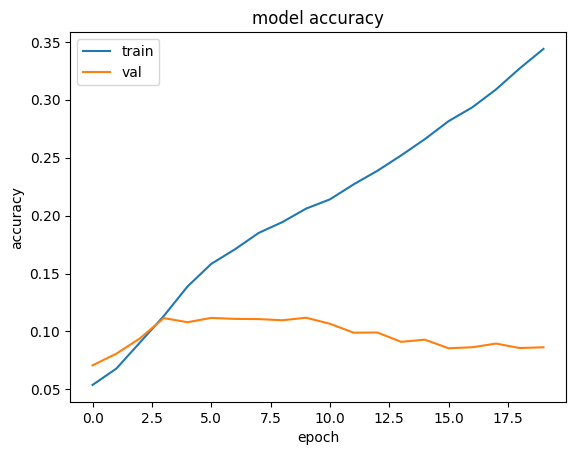

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [55]:
light_model = Sequential([
    Embedding(total_words, 128, input_length=max_sequence_len-1),
    LSTM(64),
    Dropout(0.2),
    Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(total_words, activation='softmax')
])

In [58]:
def compile_model(model):
  model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
      )
  return model

In [64]:
def fit_model(model):
  history = model.fit(
      predictors,
      label,
      epochs=7,
      validation_split=0.2,
      callbacks=[callback],
      verbose=1)
  return history

In [61]:
compile_model(light_model)

In [62]:
fit_model(light_model)

Epoch 1/100
746/746 [==============================] - 171s 225ms/step - loss: 6.3271 - accuracy: 0.0532 - val_loss: 6.9859 - val_accuracy: 0.0698
Epoch 2/100
746/746 [==============================] - 168s 226ms/step - loss: 5.8768 - accuracy: 0.0639 - val_loss: 7.1982 - val_accuracy: 0.0845
Epoch 3/100
746/746 [==============================] - 167s 224ms/step - loss: 5.6206 - accuracy: 0.0832 - val_loss: 7.4434 - val_accuracy: 0.0872
Epoch 4/100
746/746 [==============================] - 172s 231ms/step - loss: 5.4101 - accuracy: 0.1020 - val_loss: 7.5499 - val_accuracy: 0.0938
Epoch 5/100
746/746 [==============================] - 172s 230ms/step - loss: 5.2128 - accuracy: 0.1173 - val_loss: 7.6583 - val_accuracy: 0.1065
Epoch 6/100
746/746 [==============================] - 169s 227ms/step - loss: 5.0272 - accuracy: 0.1312 - val_loss: 7.7984 - val_accuracy: 0.1000
Epoch 7/100
746/746 [==============================] - 169s 226ms/step - loss: 4.8557 - accuracy: 0.1464 - val_loss: 8

In [63]:
print(make_new_text(seed_text=seed_text, next_words=next_words))

Hi, my name is the same thing i know with them here here here


В целом - надо поиграть с переобучением. Поменять регуляризацию, побольше дропаут сделать и т.д. К моему сожадению гугл не выдает мне машину с ГПУ, поэтому даже 5 эпох считается по пол часа. Больше двадцати эпох не посчитать - гугл обнуляет мою сессию из-за ограничения по времени. Моя личная машинка считает еще в разы медленнее. Вынужден остановиться на данном этапе, иначе такими темпами еще две недели потрачу на доводку.